In [27]:
import pandas as pd
import numpy as np
import csv as csv
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
# read the data and display the first 5 rows
train_df = pd.read_csv('train_hw5.csv', header=0)
print(train_df.shape)
train_df.head()

(9174, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


# understanding/visualizing the data set

In [29]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


# CREATING/EXTRACTING A NEW FEATURE

In [30]:
def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour

def get_year(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").year

def get_month(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").month

def get_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").day

def get_day_of_week(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").weekday()

def norm_temp(temp):
    return (temp - 0.82) / (41 - 0.82)

def norm_atemp(atemp):
    return (atemp - 0.76) / (45.455 - 0.76)

def norm_humidity(humidity):
    return humidity / 100

def norm_windspeed(windspeed):
    return windspeed / 56.9969

def norm_weather(weather):
    return (weather - 1) / (4 - 1)

def season_new(dt):
    if dt == 1:
        season_index = 0.15
    if dt == 2:
        season_index = 0.28
    if dt == 3:
        season_index = 0.31
    if dt == 4:
        season_index = 0.26
    return season_index 

In [31]:
train_df['year'] = train_df['datetime'].map(get_year)
train_df['month'] = train_df['datetime'].map(get_month)
train_df['day'] = train_df['datetime'].map(get_day)
train_df['hour'] = train_df['datetime'].map(hour_of_day)
train_df['day_of_week'] = train_df['datetime'].map(get_day_of_week)
train_df['n_temp'] = train_df['temp'].map(norm_temp)
train_df['n_atemp'] = train_df['atemp'].map(norm_atemp)
train_df['n_humidity'] = train_df['humidity'].map(norm_humidity)
train_df['n_windspeed'] = train_df['windspeed'].map(norm_windspeed)
train_df['n_season'] = train_df['season'].map(season_new)
train_df['n_weather'] = train_df['weather'].map(norm_weather)
train_df.head()
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,day,hour,day_of_week,n_temp,n_atemp,n_humidity,n_windspeed,n_season,n_weather
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,...,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,...,6.517114,8.498365,11.537933,3.024090,0.480597,0.510537,0.617151,0.223485,0.250351,0.138289
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,...,3.447047,4.611702,6.915338,1.999882,0.197623,0.192817,0.194018,0.143850,0.060227,0.211788
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,...,4.000000,4.000000,6.000000,1.000000,0.326531,0.355856,0.460000,0.122840,0.260000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,...,7.000000,8.000000,12.000000,3.000000,0.489796,0.525338,0.610000,0.193018,0.280000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,...,10.000000,13.000000,18.000000,5.000000,0.653061,0.677928,0.780000,0.298225,0.310000,0.333333
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,...,12.000000,16.000000,23.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.310000,1.000000


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


<Container object of 24 artists>

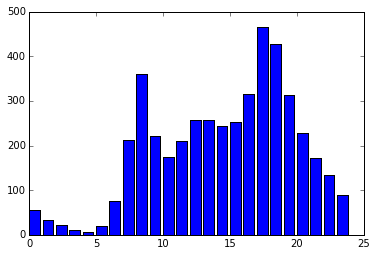

In [21]:
# now see mean counts per hour
hours = np.unique(train_df['hour'])
print(hours)

hours_mean = {}
for h in hours:
    # data frame at only a certain time of day
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()

plt.bar(hours,[hours_mean[h] for h in hours])

# perform regression (starting with simple sanity check)

RMS error (likely overfitting): 14.3268673136


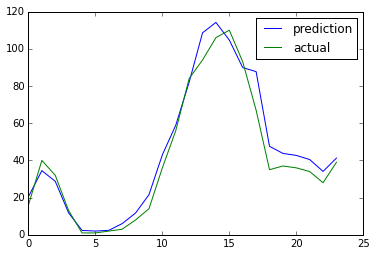

In [55]:
#col = ['temp']
#col = ['tod']
#col = ['tod','temp']
#col = ['tod','season','workingday']
#col = ['tod','season','workingday','temp']

col = ['year', 'month', 'day', 'hour', 'n_atemp', 'n_humidity', 'n_season', 'day_of_week', 'n_weather', 'holiday', 'workingday']

# fit the model to the data
model = RandomForestRegressor(n_estimators = 125)
model = model.fit( train_df[col], train_df['count'])

# observe the prediction (on the training data: LIKELY OVERFITTING)
pred_count = model.predict(train_df[col])
plt.hold('on')
plt.plot(range(24),pred_count[0:24])
plt.plot(range(24),train_df['count'][0:24])
plt.hold('off')
plt.legend(['prediction','actual'])

# score the model (PROBABLY OVERFITTING)
rms = np.sqrt(np.mean(np.square(pred_count - train_df['count'])))
print("RMS error (likely overfitting):",rms)

# cross validation for model checking

In [54]:
from sklearn.grid_search import GridSearchCV

# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [105, 110, 115, 120, 125, 130]}]

score = 'mean_squared_error'
print("# Tuning hyper-parameters for %s" % score)

clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, 
                   cv=5, scoring=score)
clf.fit(train_df[col], train_df['count'])

print("Best parameters set found on development set:\n")
print(clf.best_estimator_,"\n")
print("Grid scores on development set:\n")

for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (np.sqrt(np.abs(scores).mean()), np.sqrt(np.abs(scores)).std() / 2, params))

# Tuning hyper-parameters for mean_squared_error
Best parameters set found on development set:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False) 

Grid scores on development set:

75.388 (+/-6.827) for {'n_estimators': 105}
75.127 (+/-6.793) for {'n_estimators': 110}
75.673 (+/-6.516) for {'n_estimators': 115}
75.066 (+/-6.776) for {'n_estimators': 120}
74.943 (+/-6.764) for {'n_estimators': 125}
75.449 (+/-6.674) for {'n_estimators': 130}


# creating the test file output

In [56]:
# read in the test data
test_df = pd.read_csv('test_hw5.csv', header=0)
print(test_df.shape)
# add the new feature(s) into the test data
test_df['year'] = test_df['datetime'].map(get_year)
test_df['month'] = test_df['datetime'].map(get_month)
test_df['day'] = test_df['datetime'].map(get_day)
test_df['hour'] = test_df['datetime'].map(hour_of_day)
test_df['day_of_week'] = test_df['datetime'].map(get_day_of_week)
test_df['n_temp'] = test_df['temp'].map(norm_temp)
test_df['n_atemp'] = test_df['atemp'].map(norm_atemp)
test_df['n_humidity'] = test_df['humidity'].map(norm_humidity)
test_df['n_windspeed'] = test_df['windspeed'].map(norm_windspeed)
test_df['n_season'] = test_df['season'].map(season_new)
test_df['n_weather'] = test_df['weather'].map(norm_weather)
test_df.head()
test_df.describe()

(1712, 9)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,day_of_week,n_temp,n_atemp,n_humidity,n_windspeed,n_season,n_weather
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,2.512266,0.014019,0.691589,1.437500,20.769182,24.065832,62.804907,13.128763,2011.504089,6.544977,17.999416,11.561332,2.959696,0.496495,0.521442,0.628049,0.230342,0.250870,0.145833
std,1.114104,0.117602,0.461972,0.625445,6.916677,7.650085,18.360263,7.971457,0.500129,3.430919,0.819473,6.920504,2.029332,0.172142,0.171162,0.183603,0.139858,0.059982,0.208482
min,1.000000,0.000000,0.000000,1.000000,4.920000,6.060000,8.000000,0.000000,2011.000000,1.000000,17.000000,0.000000,0.000000,0.102041,0.118581,0.080000,0.000000,0.150000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,15.580000,19.695000,49.000000,7.001500,2011.000000,4.000000,17.000000,6.000000,1.000000,0.367347,0.423649,0.490000,0.122840,0.260000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,64.000000,12.998000,2012.000000,7.000000,18.000000,12.000000,3.000000,0.510204,0.542343,0.640000,0.228047,0.280000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,25.420000,30.305000,77.000000,16.997900,2012.000000,10.000000,19.000000,18.000000,5.000000,0.612245,0.661036,0.770000,0.298225,0.310000,0.333333
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,50.002100,2012.000000,12.000000,19.000000,23.000000,6.000000,0.938776,0.966104,1.000000,0.877278,0.310000,0.666667


In [57]:
# fit the model to the training data
# note: using the selected columns from before

model = RandomForestRegressor(n_estimators = 125)
model.fit( train_df[col], train_df['count'])

# apply to the test data
pred_count = model.predict(test_df[col])
test_df['count'] = pred_count

# save as a csv with the header 'count'
out_df = test_df.to_csv('out_hw5_3.csv', index=True, index_label='id', header=True, columns=['count'])